Experimente zu Faltungen
======================

Zeitreihen
---------------

Erzeuge "zufällige" Test-Zeitreihe.

In [3]:
import random
import math
import json


file_name = "ts_example.txt"


def generate_time_series_example(n):
	r = random.random()
	ts = [50 + 20*(math.sin(i/(n/5)*math.pi + random.random())*math.sin(random.random()) + math.sin(random.random())) for i in range(0, n)]
	return ts

def save_time_series_example(time_series):
	with open(file_name, "w") as file:
		json.dump(time_series, file)

def read_time_series_example():
	with open(file_name, "r") as file:
		return list(json.load(file))




if __name__ == '__main__':
	save_time_series_example(generate_time_series_example(200))




Berechne und visualisiere einfachen gleitenden Mittelwert 4. Ordnung der generierten Zeitreihe

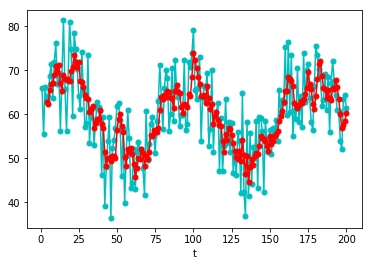

In [6]:
import numpy
import matplotlib.pyplot as pyplot


### Berechne Moving Average n-ter Ordnung
def moving_average(vec, n):
	smooth_filter = [(1/n) for i in range(0, n)]
	return list(numpy.convolve(vec, smooth_filter))
###


if __name__ == '__main__':
	# Periode des Moving Average
	n = 4

	# Lese gespeichertes Beispiel ein
	time_series = read_time_series_example()


	# Koordinaten der Zeitserie
	Y_ts = time_series
	X_ts = [i for i in range(1, len(Y_ts) + 1)]

	# Koordinaten der "geglätten" Zeitserie
	Y_ma = moving_average(time_series, n)[(n-1):len(Y_ts)] # Schneide zurecht, sodass Einträge i = n,...,N
	X_ma = [i for i in range(n, len(Y_ts) + 1)] 



	# Stelle Plotter ein
	pyplot.xlabel('t')
	pyplot.ylabel('')


	# plotte Zeitserie und geglättete Zeitserie
	pyplot.plot(X_ts, Y_ts, color = "c", marker = "o", markersize = 5)
	pyplot.plot(X_ma, Y_ma, color = "r", marker = "o", markersize = 5)

	# Zeige Plot
	pyplot.show()

Bildmanipulation
-------------------------

Zeige "ursprüngliches" Bild an, dabei wird mit der Identität gefaltet.

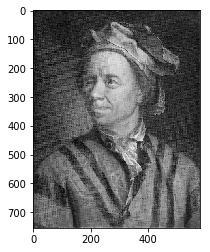

In [28]:
import filter_image

id_filter = [[1]]

filter_image.filter_and_show_image([id_filter])

Leonhard Euler wird weichgezeichnet. Filter analog zum gleitenden Mittelwert im 1-dimensionalen.

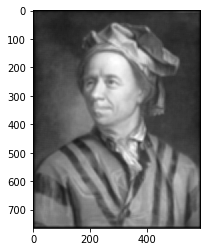

In [3]:
import filter_image


# Erstelle Blurr-Filter
n = 10
blurr_filter = [[1/(n**2) for j in range(1, n+1)] for i in range(1, n+1)] # Bspw. [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]


# Zeige gefiltertes Bild an
filter_image.filter_and_show_image([blurr_filter])




Kantendetektion mit dem Sobel-Filter.

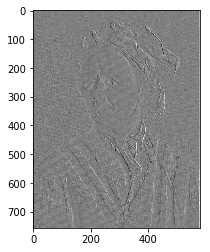

In [5]:
import filter_image


# Erstelle Edge-Detection-Filter
sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]



# Zeige gefiltertes Bild an
filter_image.filter_and_show_image([sobel_x])


Convolutional Neural Networks (CNN)
------------------------------------------------------

1. Lade Zalandos Fashion-MNIST-Daten
2. Trainiere CNN darauf, die 10 Bekleidungs-Kategorien zu erkennen
3. Teste das CNN beispielhaft

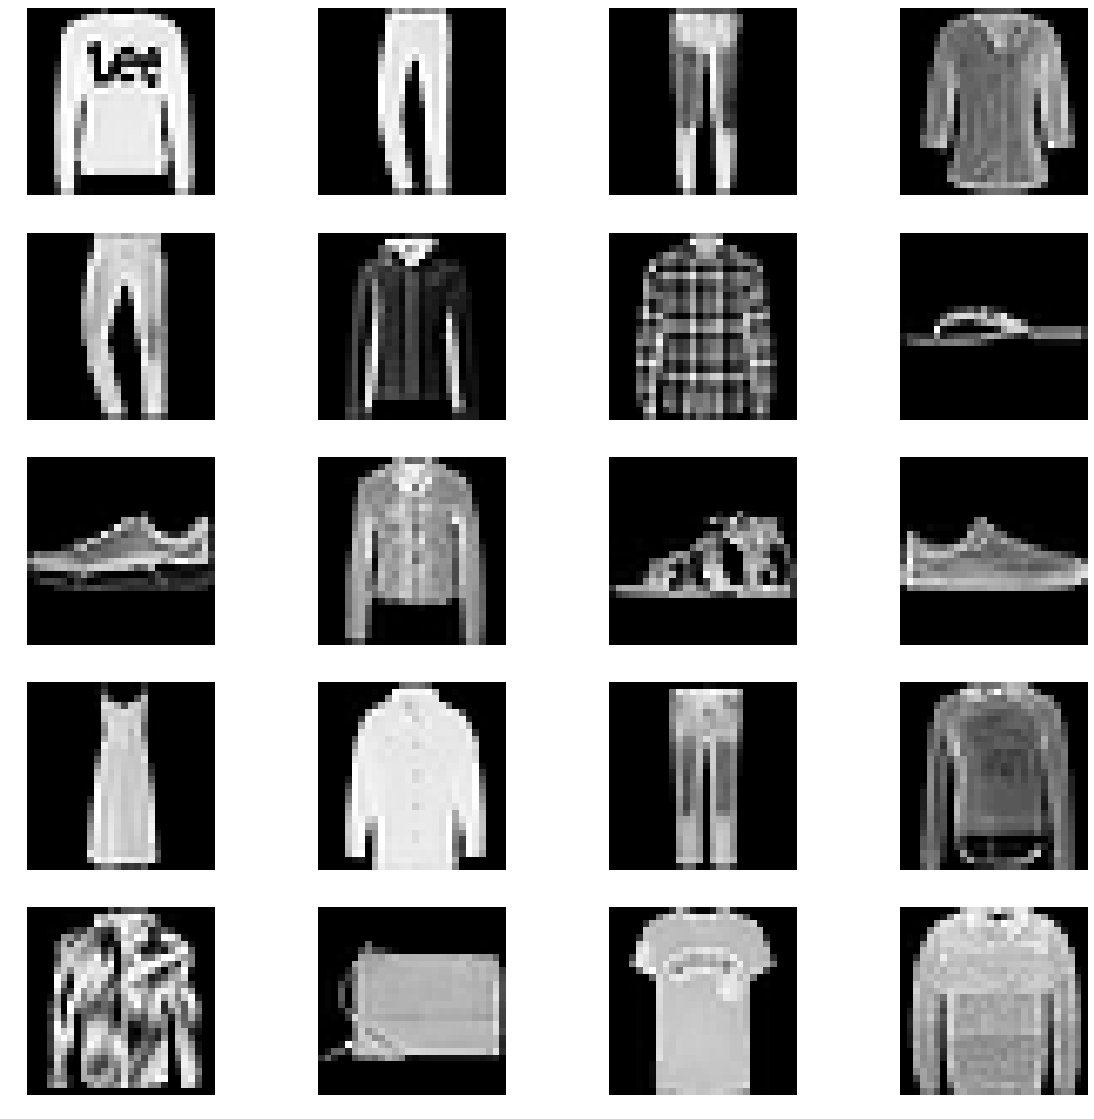

Epoch 1/5
60000/60000 [==============================] - 31s 513us/sample - loss: 0.4928 - acc: 0.8195
Epoch 2/5
60000/60000 [==============================] - 32s 528us/sample - loss: 0.3200 - acc: 0.8817
Epoch 3/5
60000/60000 [==============================] - 31s 516us/sample - loss: 0.2749 - acc: 0.8992
Epoch 4/5
60000/60000 [==============================] - 31s 524us/sample - loss: 0.2423 - acc: 0.9107
Epoch 5/5
60000/60000 [==============================] - 31s 514us/sample - loss: 0.2182 - acc: 0.9189


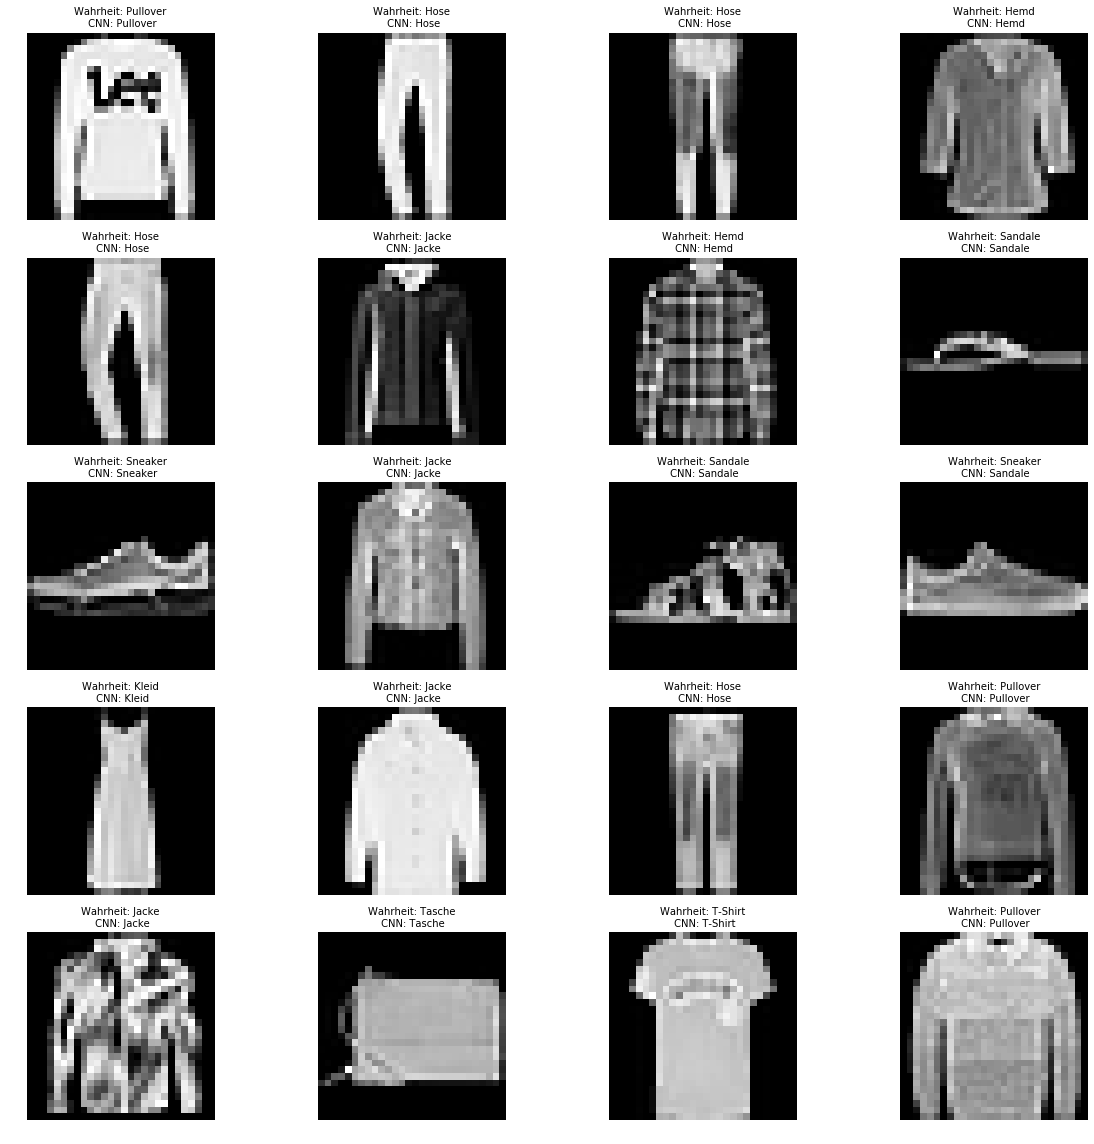

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np

import os


def fashion_label(i):
	if i > 9 or i < 0:
		raise Exception("")
	return [
		"T-Shirt",
		"Hose",
		"Pullover",
		"Kleid",
		"Jacke",
		"Sandale",
		"Hemd",
		"Sneaker",
		"Tasche",
		"Stiefelette"
	][i]


def get_preprocessed_fashion_mnist():
	(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

	train_images = train_images.reshape((60000, 28, 28, 1))
	test_images = test_images.reshape((10000, 28, 28, 1))

	# normalize pixel values to be between 0 and 1
	train_images, test_images = train_images / 255, test_images / 255

	return (train_images, train_labels), (test_images, test_labels)


# Create Model and train it using the given data
def get_trained_fashion_mnist_model(train_images, train_labels):

	model = models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Conv2D(64, (3, 3), activation='relu'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Conv2D(64, (3, 3), activation='relu'))

	model.add(layers.Flatten())
	model.add(layers.Dense(64, activation='relu'))
	model.add(layers.Dense(10, activation='softmax'))


	model.compile(optimizer='adam',
	              loss='sparse_categorical_crossentropy',
	              metrics=['accuracy'])

	model.fit(train_images, train_labels, epochs = 5)

	return model


# Show images
def show_selected_fashion(test_images, test_labels):
	fig = plt.figure(figsize=(20, 20))
	columns = 4
	rows = 5

	for i in range(1, columns*rows + 1):
		image = test_images[i]
		image = np.array(image, dtype='float')
		pixels = image.reshape((28, 28))

		subplt = fig.add_subplot(rows, columns, i)
		subplt.axis("off")

		plt.imshow(pixels, cmap='gray')

	plt.show()



def show_predicted_selected_fashion(test_images, test_labels):
	predicted = model.predict_classes(test_images)

	fig = plt.figure(figsize = (20, 20))
	columns = 4
	rows = 5

	for i in range(1, columns*rows + 1):
		image = test_images[i]
		image = np.array(image, dtype='float')
		pixels = image.reshape((28, 28))

		subplt = fig.add_subplot(rows, columns, i)
		subplt.axis("off")

		lbl = "Wahrheit: " + fashion_label(test_labels[i]) + "\n CNN: " + fashion_label(predicted[i])
		subplt.set_title(lbl, fontsize = 10)

		plt.imshow(pixels, cmap='gray')

	plt.show()


### MAIN ###

if __name__ == "__main__":

	# log settings
	tf.logging.set_verbosity(tf.logging.ERROR)
	os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


	# get data
	(train_images, train_labels), (test_images, test_labels) = get_preprocessed_fashion_mnist()

	# display selected fashion
	show_selected_fashion(test_images, test_labels)

	# train model
	model = get_trained_fashion_mnist_model(train_images, train_labels)


	# display predicted fashion
	show_predicted_selected_fashion(test_images, test_labels)
